# Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV ,cross_val_score 
from sklearn.metrics import classification_report, make_scorer, accuracy_score, f1_score, precision_score, recall_score

#  Data Exploration and Visualization

### Loading the titanic dataset

In [2]:
tt_data = pd.read_csv("train.csv")

### Inspecting the data

In [3]:
# The rows and column of the data
tt_data.shape

(712, 12)

 .shape method displays the total number of rows and columns in the dataset. It is used to get the shape of the DataFrame. It returns a tuple of two values, the first value is the number of rows and the second value is the number of columns. From this dataset, there are 712 individual row entries and 12 columns.

In [4]:
# Displaying the data information
tt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


Used the .info method to get information about the dataframe. This information includes the number of rows and columns, the column names together with their data types and their individual non-null row entries. It also shows the memory usage. The .info() method is useful for getting a quick overview of the structure and content of a dataframe.

In [5]:
# Displaying the top 10 rows
tt_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1
5,653,3,"Kalvik, Mr. Johannes Halvorsen",male,21.0,0,0,8475,8.4333,NaN,S,0
6,510,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S,1
7,558,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C,0
8,829,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1
9,19,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S,0


### Inspecting the unique values for some categorical data

In [6]:
# Unique values for Sex
tt_data.Sex.unique()

array(['male', 'female'], dtype=object)

In [7]:
# Unique values for Cabin
tt_data.Cabin.unique()

array([nan, 'C95', 'A26', 'C78', 'D15', 'E49', 'C52', 'C104', 'A5',
       'F G73', 'E44', 'B96 B98', 'D30', 'C45', 'G6', 'C70',
       'B57 B59 B63 B66', 'B80', 'F E69', 'C106', 'E8', 'D9', 'E68',
       'D17', 'B58 B60', 'C125', 'B18', 'C83', 'B3', 'F33', 'C92', 'E121',
       'B22', 'E33', 'C23 C25 C27', 'E67', 'B35', 'C85', 'F2', 'E12',
       'A14', 'B86', 'A10', 'D45', 'C47', 'D33', 'D6', 'C91', 'C62 C64',
       'C65', 'B101', 'A7', 'A31', 'D49', 'D11', 'D35', 'E101', 'B69',
       'B102', 'C7', 'C2', 'C124', 'C82', 'B4', 'A34', 'D26', 'C110',
       'A19', 'B42', 'A16', 'B78', 'B94', 'B50', 'E34', 'C99', 'C118',
       'D10 D12', 'E46', 'B39', 'B19', 'C68', 'B37', 'A20', 'B30', 'A24',
       'D56', 'E58', 'E25', 'E36', 'F4', 'T', 'D', 'C126', 'C32',
       'C22 C26', 'E17', 'C90', 'D19', 'E24', 'D47', 'E38', 'B82 B84',
       'B49', 'E50', 'B28', 'C93', 'F G63', 'D21', 'E77', 'C46', 'E10',
       'D20', 'A32', 'C123', 'A23', 'E40', 'B20', 'A36', 'D36', 'B77',
       'B73', 'C54

In [8]:
# Unique values for Embarked
tt_data.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

.unique method is used to get the unique values in a column. It is usually used to get the unique values in a categorical data.

### Statistics for the Numerical features

In [9]:
tt_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000,712.000000
mean,444.405899,2.308989,29.807687,0.492978,0.390449,31.819826,0.383427
std,257.465527,0.833563,14.485211,1.060720,0.838134,48.059104,0.486563
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,439.500000,3.000000,28.500000,0.000000,0.000000,14.454200,0.000000
75%,667.250000,3.000000,39.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


The .describe method is used to get the statistics of the dataset. It returns the following information: 
count(the total number), mean, std(standard deviation), min(minimum value), 25%(25th percentile), 50% (median), 75% (75th percentile), max(maximum value).

### Statistics for the Categorical features

In [10]:
tt_data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,712,712,712,160,710
unique,712,2,571,127,3
top,"Bradley, Mr. George (""George Arthur Brayton"")",male,1601,G6,S
freq,1,459,6,4,516


Using the .describe method together with the argument "include='O'" displays the statistics for categorical data usually in the form of an object datatype.

### Relationship between Features

<Axes: xlabel='Survived', ylabel='count'>

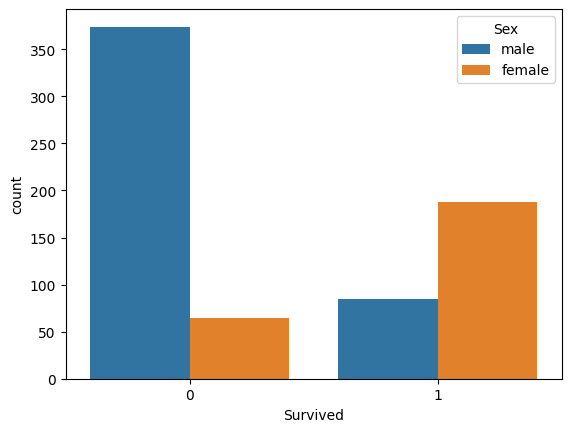

In [11]:
# Relationship between Survived and Sex
sn.countplot(data=tt_data, hue=tt_data["Sex"], x=tt_data["Survived"])

<Axes: xlabel='Survived', ylabel='count'>

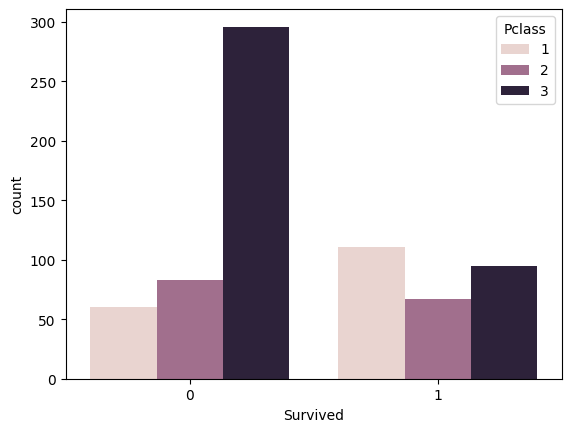

In [12]:
# Relationship between Survived and Class
sn.countplot(data=tt_data, x=tt_data["Survived"], hue=tt_data["Pclass"])

<Axes: xlabel='Survived', ylabel='count'>

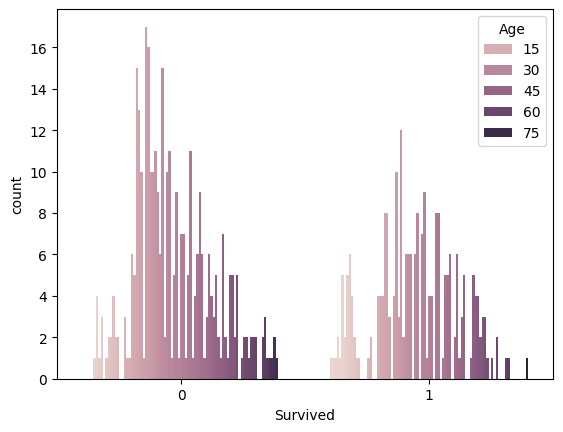

In [13]:
# Relationship between Survived and Age
sn.countplot(data=tt_data, x=tt_data["Survived"], hue=tt_data["Age"])

The relationship between the features is plotted using a countplot. The countplot is a type of bar chart that displays the number of observations in the feature specified. There is also a legend to help identify the different features.

## Data Cleaning and Preprocessing

### Handling Missing Values

In [14]:
# Checking for columns with null values
tt_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            137
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          552
Embarked         2
Survived         0
dtype: int64

Using the .isnull().sum() method, we can count the number of missing values in each column. The output of this method is the name of all columns with their respective number of missing values. With this dataset, Age, Cabin and Embarked are the columns with missing values.

Handling Missing Values for Age

In [15]:
# Checking for the percentage of null values for Age
print(tt_data["Age"].isnull().sum() / len(tt_data) * 100)

19.241573033707866


19% of null values for age is too large to be dropped. We will need to impute the missing values.

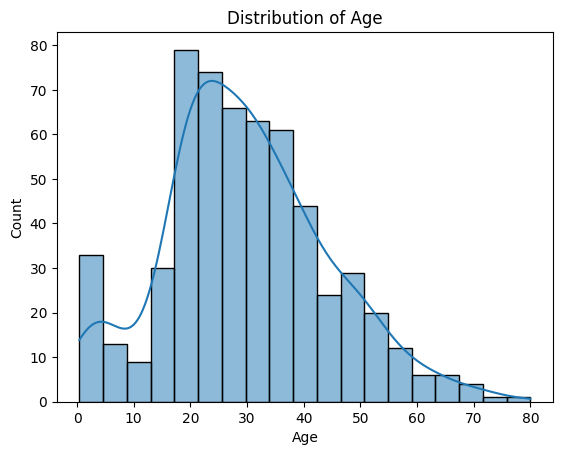

In [16]:
# Checking the distribution of Age
sn.histplot(data=tt_data, x=tt_data["Age"], kde=True)
plt.title("Distribution of Age")
plt.show()

The distribution for age is skewed so the median will be used to impute the missing values.


In [17]:
# Replacing the null values in Age with the median
median_age = tt_data["Age"].median()
tt_data["Age"] = tt_data["Age"].fillna(median_age)

Handling Missing Values for Cabin.

In [18]:
# Checking for the percentage of null values for Cabin
print(tt_data["Cabin"].isnull().sum() / len(tt_data) * 100)

77.52808988764045


77% is too large to be dropped. It might affect the performance of our model so we will impute it.

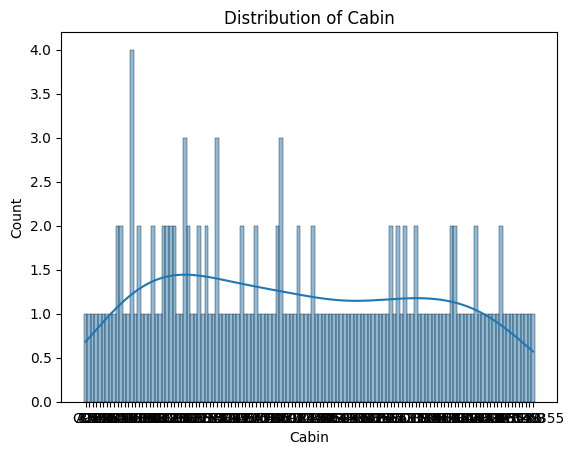

In [19]:
# Checking the distribution of Cabin
sn.histplot(data=tt_data, x=tt_data["Cabin"], kde=True)
plt.title("Distribution of Cabin")
plt.show()

The distribution looks like a normal distribution and since it is a categorical variable, i will impute the missing values with the mode

In [20]:
# Replacing the null values in Cabin with the mode
cabin_mode = tt_data["Cabin"].mode()[0]
tt_data["Cabin"] = tt_data["Cabin"].fillna(cabin_mode)

Handling Missing Values for Embarked

In [21]:
# Checking for the percentage of null values for Embarked
print(tt_data["Embarked"].isnull().sum() / len(tt_data) * 100)

0.2808988764044944


0.2% is relatively a small fraction of the data set so we can drop those null values

In [22]:
# Dropping the rows with null values in Embarked
tt_data.dropna(subset=["Embarked"], inplace=True)

In [23]:
tt_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

In [24]:
# Extracting the title from the Name column
tt_data["Title"] = tt_data["Name"].str.extract("([A-Za-z]+)\\.")

### Encoding Categorical Variables

In [25]:
# Selecting columns with the object data type
cols = tt_data.select_dtypes(include="object")

# Looping through all the columns and encoding them
for col in cols:
  encode = LabelEncoder()
  tt_data[col] = encode.fit_transform(tt_data[col])

In [26]:
print(tt_data.head())

   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket      Fare  \
0          693       3   365    1  28.5      0      0      65   56.4958   
1          482       2   212    1  28.5      0      0     114    0.0000   
2          528       1   195    1  28.5      0      0     487  221.7792   
3          856       3     5    0  18.0      0      1     398    9.3500   
4          802       2   138    0  31.0      1      1     465   26.2500   

   Cabin  Embarked  Survived  Title  
0    124         2         1      9  
1    124         2         0      9  
2     75         2         0      9  
3    124         2         1     10  
4    124         2         1     10  


## Feature Engineering

### Generating new features

In [27]:
# Generating family size feature
tt_data["FamilySize"] = tt_data["SibSp"] + tt_data["Parch"] + 1

In [28]:
# Generating isChild feature
tt_data["isChild"] = np.where(tt_data["Age"] < 18, 1, 0)

In [29]:
# Generating economic status feature by combining Pclass and Fare
tt_data["EconomicStatus"] = ((4 - tt_data["Pclass"]) * tt_data["Fare"] / tt_data["Fare"].max() * 100 + 1)


In [30]:
# Verifying the new feature
tt_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize,isChild,EconomicStatus
0,693,3,365,1,28.5,0,0,65,56.4958,124,2,1,9,1,0,12.027246
1,482,2,212,1,28.5,0,0,114,0.0000,124,2,0,9,1,0,1.000000
2,528,1,195,1,28.5,0,0,487,221.7792,75,2,0,9,1,0,130.865251
3,856,3,5,0,18.0,0,1,398,9.3500,124,2,1,10,2,0,2.824998
4,802,2,138,0,31.0,1,1,465,26.2500,124,2,1,10,3,0,11.247318


### Feature selection

Exploring features

In [31]:
# Checking the correlation between the features and the target
corr_matrix = tt_data.corr()
corr_matrix["Survived"].sort_values(ascending=False)


Survived          1.000000
EconomicStatus    0.285859
Fare              0.272921
isChild           0.130000
Parch             0.086065
FamilySize        0.029033
PassengerId       0.011934
SibSp            -0.024516
Name             -0.067622
Age              -0.078924
Title            -0.147172
Ticket           -0.166972
Embarked         -0.191613
Cabin            -0.254644
Pclass           -0.344371
Sex              -0.546996
Name: Survived, dtype: float64

In [32]:
# Checking the number of unique values in the Name column
print(tt_data["Name"].nunique())

# Checking the number of unique values in the passengerId column
print(tt_data["PassengerId"].nunique())



710
710


Using domain knowledge and the given information, we derive that name and passengerId are identifiers for the individual rows. It doesn't really have any inherent relationship to survival so we can drop it.

In [33]:
# Dropping Name and PassengerId columns
tt_data.drop(columns=["Name", "PassengerId"], inplace=True)

In [34]:
# verifying
tt_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title,FamilySize,isChild,EconomicStatus
0,3,1,28.5,0,0,65,56.4958,124,2,1,9,1,0,12.027246
1,2,1,28.5,0,0,114,0.0000,124,2,0,9,1,0,1.000000
2,1,1,28.5,0,0,487,221.7792,75,2,0,9,1,0,130.865251
3,3,0,18.0,0,1,398,9.3500,124,2,1,10,2,0,2.824998
4,2,0,31.0,1,1,465,26.2500,124,2,1,10,3,0,11.247318


### Splitting the data into features and labels

In [35]:
features = tt_data.drop("Survived", axis=1)
target = tt_data["Survived"]

### Normalizing numerical features
The numerical features in the dataset are normalized to have zero mean and unit variance. This is done to
ensure that all features are on the same scale, which can improve the performance of the model.


In [36]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [37]:
features

array([[ 0.82686215,  0.73948696, -0.07696325, ..., -0.55736463,
        -0.36878178, -0.1289155 ],
       [-0.3761545 ,  0.73948696, -0.07696325, ..., -0.55736463,
        -0.36878178, -0.50995579],
       [-1.57917115,  0.73948696, -0.07696325, ..., -0.55736463,
        -0.36878178,  3.97746509],
       ...,
       [ 0.82686215, -1.3522889 ,  1.42610652, ...,  1.95919427,
        -0.36878178, -0.27811094],
       [-1.57917115,  0.73948696,  1.34902602, ..., -0.55736463,
        -0.36878178,  0.26904289],
       [-1.57917115,  0.73948696, -0.07696325, ..., -0.55736463,
        -0.36878178,  0.0272498 ]])

### Splitting the dataset into training and testing sets

In [38]:

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)


In [155]:
X_val

array([[-1.57917115,  0.73948696, -0.07696325, ..., -0.55736463,
        -0.36878178, -0.50995579],
       [-0.3761545 ,  0.73948696,  2.35107254, ...,  0.70091482,
        -0.36878178,  0.01612124],
       [-0.3761545 , -1.3522889 , -0.192584  , ...,  0.0717751 ,
        -0.36878178, -0.22668354],
       ...,
       [-1.57917115,  0.73948696,  0.65530151, ...,  0.0717751 ,
        -0.36878178,  1.31108009],
       [-1.57917115, -1.3522889 ,  0.0386575 , ..., -0.55736463,
        -0.36878178,  0.1172899 ],
       [-1.57917115, -1.3522889 ,  1.88858953, ...,  0.0717751 ,
        -0.36878178,  1.07367164]])

In [39]:
X_train.shape, X_val.shape

((568, 13), (142, 13))

## Model Selection and Training

### A General Function to Train the Models

In [40]:
# Function to train a model
def train_model(model_selected, train_data_features, train_data_target, val_data_features, val_data_target):
    # Instantiating the model
    model = model_selected

    # Training the model  
    model.fit(train_data_features, train_data_target)

    # Making predictions
    predictions = model.predict(val_data_features)

    # Displaying the predictions
    print(f"Predicted results sample \n\n{predictions[:20]}")

    print("\n\n")
    
    # Classification report
    print(f"Classification report \n\n{classification_report(val_data_target, predictions)}")

    print("\n\n")

    # Cross-validation using Stratified k-fold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, train_data_features, train_data_target, cv=skf, scoring='accuracy')
    print(f"Cross-validation \n\n{scores}") 
    print("Mean Accuracy:", scores.mean())


### Logistic Regression

In [41]:
logistic_regression_model = train_model(LogisticRegression(), X_train, y_train, X_val, y_val)

Predicted results sample 

[0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0]



Classification report 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        88
           1       0.72      0.67      0.69        54

    accuracy                           0.77       142
   macro avg       0.76      0.75      0.76       142
weighted avg       0.77      0.77      0.77       142




Cross-validation 

[0.83333333 0.81578947 0.81578947 0.80530973 0.7699115 ]
Mean Accuracy: 0.8080267039279615


### Random Forest

In [118]:
train_model(RandomForestClassifier(), X_train, y_train, X_val, y_val)

Predicted results sample 

[0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0]



Classification report 

              precision    recall  f1-score   support

           0       0.86      0.89      0.87        88
           1       0.80      0.76      0.78        54

    accuracy                           0.84       142
   macro avg       0.83      0.82      0.83       142
weighted avg       0.84      0.84      0.84       142




Cross-validation 

[0.81578947 0.8245614  0.78070175 0.79646018 0.82300885]
Mean Accuracy: 0.808104331625524


### K-Nearest Neighbors (KNN)

In [75]:
train_model(KNeighborsClassifier(), X_train, y_train, X_val, y_val)

Predicted results sample 

[0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0]



Classification report 

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        88
           1       0.80      0.67      0.73        54

    accuracy                           0.81       142
   macro avg       0.81      0.78      0.79       142
weighted avg       0.81      0.81      0.81       142




Cross-validation 

[0.81578947 0.81578947 0.76315789 0.78761062 0.83185841]
Mean Accuracy: 0.8028411737307872


### Support Vector Machines (Suport Vector Classification)

In [81]:
train_model(SVC(), X_train, y_train, X_val, y_val)

Predicted results sample 

[0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0]



Classification report 

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        88
           1       0.81      0.72      0.76        54

    accuracy                           0.83       142
   macro avg       0.83      0.81      0.82       142
weighted avg       0.83      0.83      0.83       142




Cross-validation 

[0.83333333 0.85087719 0.78070175 0.81415929 0.81415929]
Mean Accuracy: 0.8186461729545101


### Decision Tree Classifier

In [92]:
train_model(DecisionTreeClassifier(), X_train, y_train, X_val, y_val)

Predicted results sample 

[0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0]



Classification report 

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        88
           1       0.81      0.78      0.79        54

    accuracy                           0.85       142
   macro avg       0.84      0.83      0.83       142
weighted avg       0.84      0.85      0.84       142




Cross-validation 

[0.77192982 0.76315789 0.74561404 0.74336283 0.77876106]
Mean Accuracy: 0.760565129638255


### Hyperparameter Tuning

### A General Function to Optimize Models (Using GridSearchCv)

In [46]:
def optimize_model(model_selected, param_grid, train_data_features, train_data_target, val_data_features, val_data_target):
    # Instantiating the model
    model = model_selected
    
    # Setting up the scoring metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'f1': make_scorer(f1_score),
        'recall': make_scorer(recall_score)
    }
    
    # Setting up GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring=scoring, cv=5, refit='accuracy', 
                               return_train_score=True, verbose=2)

    # Fitting the model
    grid_search.fit(train_data_features, train_data_target)

    # Making predictions
    predictions = grid_search.best_estimator_.predict(val_data_features)

    # Displaying the predictions
    print(f"Predicted results sample \n\n{predictions[:20]}")

    print("\n\n")

    # Classification report
    print(f"Classification report \n\n{classification_report(val_data_target, predictions)}")

    print("\n\n")

    # Best parameters and scores
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score for accuracy:", grid_search.best_score_)

### Optimizing Logistic Regression Model

In [47]:
# Parameter grid 
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2']
}

optimize_model(model_selected= LogisticRegression(),
                param_grid= param_grid_logreg, 
                train_data_features= X_train, 
                train_data_target= y_train, 
                val_data_features= X_val, 
                val_data_target= y_val)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.01, penalty=l2, solv

### Optimizing Random Forest Model

In [117]:
# Parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4]  # Minimum samples in a leaf node
}

optimize_model(model_selected=RandomForestClassifier(),
               param_grid=param_grid_rf,
               train_data_features=X_train,
               train_data_target=y_train,
               val_data_features=X_val,
               val_data_target=y_val)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_de

### Optimizing K-Nearest Neighbors model

In [49]:
# Parameter grid
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

optimize_model(model_selected=KNeighborsClassifier(),
               param_grid=param_grid_knn,
               train_data_features=X_train,
               train_data_target=y_train,
               val_data_features=X_val,
               val_data_target=y_val)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

### Optimizing Support Vector Machines (SVC)

In [50]:
# Parameter grid
param_grid_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Kernel coefficient for 'rbf' and 'poly'
}

optimize_model(model_selected=SVC(),
               param_grid=param_grid_svc,
               train_data_features=X_train,
               train_data_target=y_train,
               val_data_features=X_val,
               val_data_target=y_val)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   0.0s
[CV] END ....................C=0.1, gamma=scale

c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ...................

c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................

c:\Users\AndrewMarfo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ........................C=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...................

### Optimizing Decision Tree Classifier

In [116]:
# Parameter grid
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],  # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}

optimize_model(model_selected=DecisionTreeClassifier(),
               param_grid=param_grid_dt,
               train_data_features=X_train,
               train_data_target=y_train,
               val_data_features=X_val,
               val_data_target=y_val)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

The best model i got is the Random Forest model with an accuracy of 0.85 and a precision of 0.84.

### Training my chosen model with the best hyperparameters I found

In [120]:
# Defining the parameters
parameter_grid = {
    'max_depth': 10, 
    'min_samples_leaf': 1, 
    'min_samples_split': 10, 
    'n_estimators': 200
    }

# Instantiating the model with the parameters
my_chosen_model = RandomForestClassifier(
    max_depth=parameter_grid['max_depth'],
    min_samples_leaf=parameter_grid['min_samples_leaf'],
    min_samples_split=parameter_grid['min_samples_split'],
    n_estimators=parameter_grid['n_estimators'],
    random_state=42
)

# Training the model
my_chosen_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200,
                       random_state=42)

This model will be used to predict the survival in the test.csv file

# Testing and Submission

### Loading the test data

In [96]:
tt_test_data = pd.read_csv("test.csv")

### Inspecting and cleaning the data

In [98]:
tt_test_data.shape

(179, 11)

In [99]:
tt_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Pclass       179 non-null    int64  
 2   Name         179 non-null    object 
 3   Sex          179 non-null    object 
 4   Age          139 non-null    float64
 5   SibSp        179 non-null    int64  
 6   Parch        179 non-null    int64  
 7   Ticket       179 non-null    object 
 8   Fare         179 non-null    float64
 9   Cabin        44 non-null     object 
 10  Embarked     179 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 15.5+ KB


In [107]:
# checking for null values
tt_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [100]:
# Checking for the percentage of null values for Age
print(tt_test_data["Age"].isnull().sum() / len(tt_test_data) * 100)

22.3463687150838


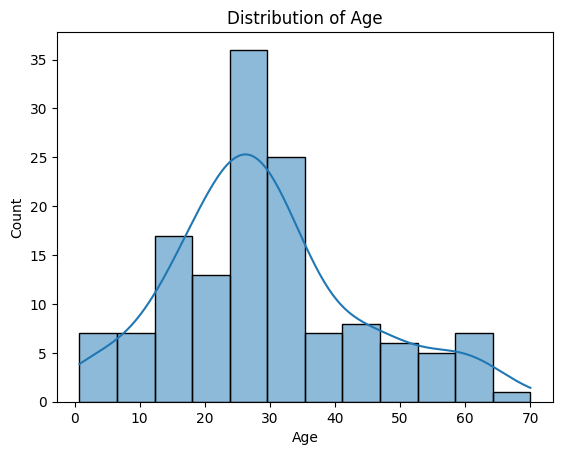

In [101]:
# Checking the distribution of Age
sn.histplot(data=tt_test_data, x=tt_test_data["Age"], kde=True)
plt.title("Distribution of Age")
plt.show()

Normal distributed graph so the missing values will be imputed with the mean

In [102]:
# Replacing the null values with the mean
test_mean_age = tt_test_data["Age"].mean()
tt_test_data["Age"] = tt_test_data["Age"].fillna(test_mean_age)

In [104]:
# Checking for the percentage of null values for Cabin
print(tt_test_data["Cabin"].isnull().sum() / len(tt_test_data) * 100)

75.41899441340783


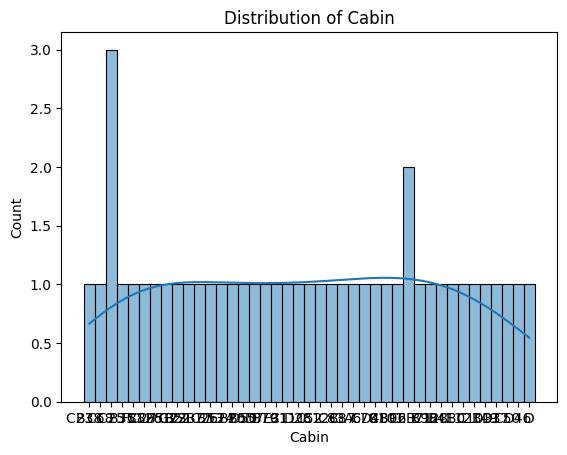

In [105]:
# Checking the distribution of Cabin
sn.histplot(data=tt_test_data, x=tt_test_data["Cabin"], kde=True)
plt.title("Distribution of Cabin")
plt.show()

Looks like a normal distribution and since it is a categorical, the missing values will be replaced with the mode

In [106]:
# Replacing the null values in Cabin with the mode
test_cabin_mode = tt_test_data["Cabin"].mode()[0]
tt_test_data["Cabin"] = tt_test_data["Cabin"].fillna(test_cabin_mode)

In [108]:
tt_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [109]:
# Extracting the title from the Name column
tt_test_data["Title"] = tt_test_data["Name"].str.extract("([A-Za-z]+)\\.")

### Encoding Categorical Variables

In [110]:
# Selecting columns with the object data type
cols = tt_test_data.select_dtypes(include="object")

# Looping through all the columns and encoding them
for col in cols:
  encode = LabelEncoder()
  tt_test_data[col] = encode.fit_transform(tt_test_data[col])

In [111]:
print(tt_data.head())

   Pclass  Sex   Age  SibSp  Parch  Ticket      Fare  Cabin  Embarked  \
0       3    1  28.5      0      0      65   56.4958    124         2   
1       2    1  28.5      0      0     114    0.0000    124         2   
2       1    1  28.5      0      0     487  221.7792     75         2   
3       3    0  18.0      0      1     398    9.3500    124         2   
4       2    0  31.0      1      1     465   26.2500    124         2   

   Survived  Title  FamilySize  isChild  EconomicStatus  
0         1      9           1        0       12.027246  
1         0      9           1        0        1.000000  
2         0      9           1        0      130.865251  
3         1     10           2        0        2.824998  
4         1     10           3        0       11.247318  


### Generating New Features

In [114]:
# Generating family size feature
tt_test_data["FamilySize"] = tt_test_data["SibSp"] + tt_test_data["Parch"] + 1

# Generating isChild feature
tt_test_data["isChild"] = np.where(tt_test_data["Age"] < 18, 1, 0)

# Generating economic status feature by combining Pclass and Fare
tt_test_data["EconomicStatus"] = ((4 - tt_test_data["Pclass"]) * tt_test_data["Fare"] / tt_test_data["Fare"].max() * 100 + 1)


In [115]:
# Verifying the new feature
tt_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,isChild,EconomicStatus
0,566,3,44,1,24.00,2,0,133,24.1500,21,2,7,3,0,5.713766
1,161,3,39,1,44.00,0,1,119,16.1000,21,2,7,2,0,4.142511
2,554,3,88,1,22.00,0,0,46,7.2250,21,0,7,1,0,2.410226
3,861,3,68,1,41.00,2,0,96,14.1083,21,2,7,3,0,3.753757
4,242,3,114,0,29.25,1,0,109,15.5000,21,1,5,2,0,4.025399


In [121]:
# Dropping Name and PassengerId columns
tt_test_data.drop(columns=["Name", "PassengerId"], inplace=True)

In [124]:
# verifying
tt_test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,isChild,EconomicStatus
0,3,1,24.00,2,0,133,24.1500,21,2,7,3,0,5.713766
1,3,1,44.00,0,1,119,16.1000,21,2,7,2,0,4.142511
2,3,1,22.00,0,0,46,7.2250,21,0,7,1,0,2.410226
3,3,1,41.00,2,0,96,14.1083,21,2,7,3,0,3.753757
4,3,0,29.25,1,0,109,15.5000,21,1,5,2,0,4.025399


### Normalizing the features

In [139]:
scaler = StandardScaler()
features = scaler.fit_transform(tt_test_data)

### Using the Chosen model to make a prediction

In [140]:
test_features = features

predicted_values = my_chosen_model.predict(test_features)

print(f"Predicted values: {predicted_values[:20]}")

Predicted values: [0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1]


### Creating a csv file for the predictions made

In [147]:
# Converting predicted_values to dataframe
survided = pd.DataFrame(predicted_values, columns=['Survived'])

passengerId = pd.DataFrame(pd.read_csv("test.csv"), columns=['PassengerId'])

In [148]:
passengerId

,PassengerId
0,566
1,161
2,554
3,861
4,242
...,...
174,881
175,92
176,884
177,474


In [151]:
survided

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
174,1
175,0
176,0
177,1


In [154]:
# Combining both dataframes
submission_df = pd.concat([passengerId,survided], axis=1)
print(submission_df.head())

   PassengerId  Survived
0          566         0
1          161         0
2          554         0
3          861         0
4          242         1


In [156]:
# Saving to a csv file
submission_df.to_csv("Andrew_submission.csv", index=False)